# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import os
import tqdm.auto as tqdm
import pathlib
import kagglehub
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay,PrecisionRecallDisplay
import glob
import subprocess
import shutil
from datetime import datetime
from kaggle_secrets import UserSecretsClient

# Data Import

In [2]:
path = kagglehub.dataset_download("aravindanr22052001/travelcsv")

In [3]:
df=pd.read_csv('/kaggle/input/datasets/aravindanr22052001/travelcsv/Travel.csv')

In [4]:
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Data preprocessing

In [5]:
df.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [7]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [8]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [10]:
df['MaritalStatus']=df['MaritalStatus'].replace('Unmarried','Single')
df['Gender']=df['Gender'].replace('Fe Male','Female')

In [11]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [12]:
data=df.copy(deep=True)

In [13]:
df.dropna(inplace=True)

In [14]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [15]:
dict_categorical={}
dict_numerical={}
for i in df.columns:
    if df[i].dtype=='object':
        dict_categorical[i]=df[i].nunique()
    else:
        dict_numerical[i]=df[i].nunique()

print(dict_categorical)

{'TypeofContact': 2, 'Occupation': 4, 'Gender': 2, 'ProductPitched': 5, 'MaritalStatus': 3, 'Designation': 5}


In [16]:
df=df.drop(columns='CustomerID')

# Train Test Split

In [17]:
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3302, 17), (826, 17))

# Transformation

In [19]:
encoder=OneHotEncoder(sparse_output=False)
sclar=StandardScaler()

In [20]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [21]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

# Model Training

In [22]:
model=RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Performance Metrics

In [24]:
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
model_test_precision = precision_score(y_test, y_test_pred)
model_test_recall = recall_score(y_test, y_test_pred) 
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

In [25]:
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

- Accuracy: 0.9383
- F1 score: 0.9346
- Precision: 0.9672
- Recall: 0.7152
- Roc Auc Score: 0.8546


# Plots

<Figure size 1500x1000 with 0 Axes>

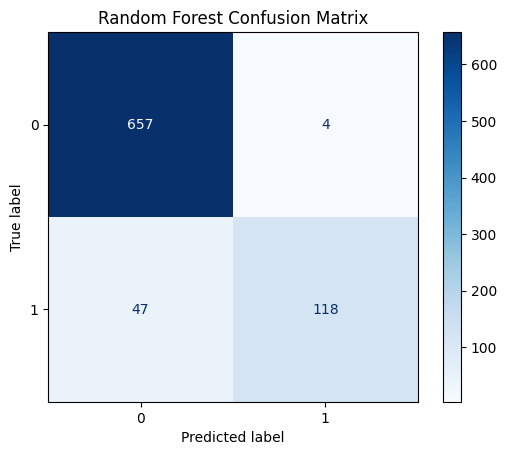

In [26]:
plt.figure(figsize=(15,10))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.savefig('Random Forest Confusion Matrix.png')
plt.show()

<Figure size 1500x1000 with 0 Axes>

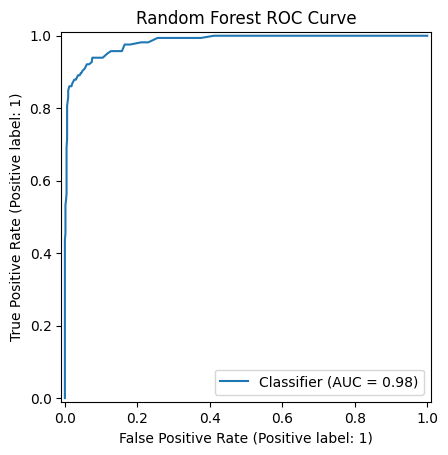

In [27]:
plt.figure(figsize=(15,10))
RocCurveDisplay.from_predictions(y_test, model.predict_proba(X_test)[:,1])
plt.title('Random Forest ROC Curve')
plt.savefig('Random Forest ROC Curve.png')
plt.show()

<Figure size 1500x1000 with 0 Axes>

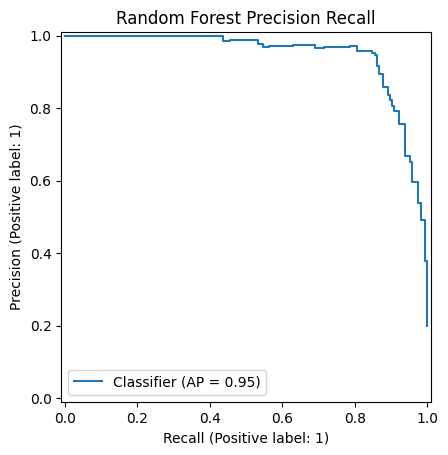

In [28]:
plt.figure(figsize=(15,10))
PrecisionRecallDisplay.from_predictions(y_test, model.predict_proba(X_test)[:,1])
plt.title('Random Forest Precision Recall')
plt.savefig('Random Forest Precision Recall.png')
plt.show()

# File Saving

In [29]:
files_to_save=['model','sclar','encoder','dict_numerical','dict_categorical','num_features','cat_features']

for i in files_to_save:
    with open(f'{i}.pkl','wb') as file:
        pickle.dump(i,file)

# Commit To GitHub

In [30]:
GITHUB_USERNAME = "Zalanemoj"
GITHUB_REPO = "General"
GITHUB_EMAIL = "zalanemoj777@gmail.com"
GITHUB_DIR = "Outputs_Random_Forest"
BRANCH = "main"

FILES_TO_PUSH = ["*.csv", "*.png", "*.jpg", "*.json","*.pkl"]
FOLDERS_TO_PUSH = ["*"]

TOKEN = UserSecretsClient().get_secret("GITHUB_TOKEN")
REPO_URL = f"https://{TOKEN}@github.com/{GITHUB_USERNAME}/{GITHUB_REPO}.git"

source = "/kaggle/working"
temp = "/kaggle/working/git_temp"

if os.path.exists(temp):
    shutil.rmtree(temp)
os.makedirs(temp)

os.chdir(temp)
subprocess.run(["git", "init"], capture_output=True)
subprocess.run(["git", "config", "user.email", GITHUB_EMAIL], capture_output=True)
subprocess.run(["git", "config", "user.name", GITHUB_USERNAME], capture_output=True)
subprocess.run(["git", "remote", "add", "origin", REPO_URL], capture_output=True)
subprocess.run(["git", "pull", "origin", BRANCH],capture_output=True)

target = os.path.join(temp, GITHUB_DIR)
os.makedirs(target, exist_ok=True)
IGNORE_FOLDERS = ["git_temp", ".virtual_documents", ".git"]
os.chdir(source)

print("Copying files:")
for pattern in FILES_TO_PUSH:
    for item in glob.glob(pattern):
        shutil.copy2(item, target)
        print(f"  ✓ {item}")

print("\nCopying folders:")
for pattern in FOLDERS_TO_PUSH:
    for folder in glob.glob(pattern):
        if any(ignored in folder for ignored in IGNORE_FOLDERS):
            continue

        if os.path.isdir(folder):
            dest = os.path.join(target, folder)
            if os.path.exists(dest):
                shutil.rmtree(dest)
            shutil.copytree(folder, dest)
            print(f"  ✓ {folder}/")

os.chdir(temp)
subprocess.run(["git", "add", "-A"], capture_output=True)
subprocess.run(["git", "commit", "-m", f"Update {datetime.now().strftime('%Y-%m-%d %H:%M')}"], capture_output=True)
subprocess.run(["git", "branch", "-M", BRANCH], capture_output=True)

result = subprocess.run(["git", "push", "-f", "origin", BRANCH], capture_output=True, text=True)

if result.returncode == 0:
    print(f"\n✅ Success! https://github.com/{GITHUB_USERNAME}/{GITHUB_REPO}/tree/{BRANCH}/{GITHUB_DIR}")
else:
    print(f"\n❌ Failed: {result.stderr}")

os.chdir(source)

Copying files:
  ✓ Random Forest ROC Curve.png
  ✓ Random Forest Precision Recall.png
  ✓ Random Forest Confusion Matrix.png
  ✓ encoder.pkl
  ✓ sclar.pkl
  ✓ cat_features.pkl
  ✓ dict_numerical.pkl
  ✓ dict_categorical.pkl
  ✓ num_features.pkl
  ✓ model.pkl

Copying folders:

✅ Success! https://github.com/Zalanemoj/General/tree/main/Outputs_Random_Forest
